In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:

df = pd.read_csv('KDDTrain+.txt', header=None, encoding='latin-1')

X = df.iloc[:, :-2]      
y_text = df.iloc[:, -2]  

le_y = LabelEncoder()
y = le_y.fit_transform(y_text) 
categorical_features_indices = [1, 2, 3] 

for col in categorical_features_indices:
    le_col = LabelEncoder()
    X.iloc[:, col] = X.iloc[:, col].fillna('missing') 
    X.iloc[:, col] = le_col.fit_transform(X.iloc[:, col])

numerical_features = X.drop(columns=categorical_features_indices).columns
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

C:\Users\yavuz\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yavuz\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\yavuz\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels wi

Model Doğruluğu (Accuracy): 0.9859

--- Sınıflandırma Raporu ---
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       276
           1       0.40      0.18      0.25        11
           2       1.00      0.33      0.50         3
           3       0.94      0.94      0.94        17
           4       0.50      0.67      0.57         3
           5       0.96      0.96      0.96      1116
           6       0.67      0.80      0.73         5
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       1.00      1.00      1.00     12422
          10       0.88      0.86      0.87       461
          11       0.99      0.99      0.99     20083
          12       0.50      1.00      0.67         1
          13       1.00      1.00      1.00         1
          14       1.00      0.95      0.98        66
          15       0.98      0.99      0.99       873
          16   

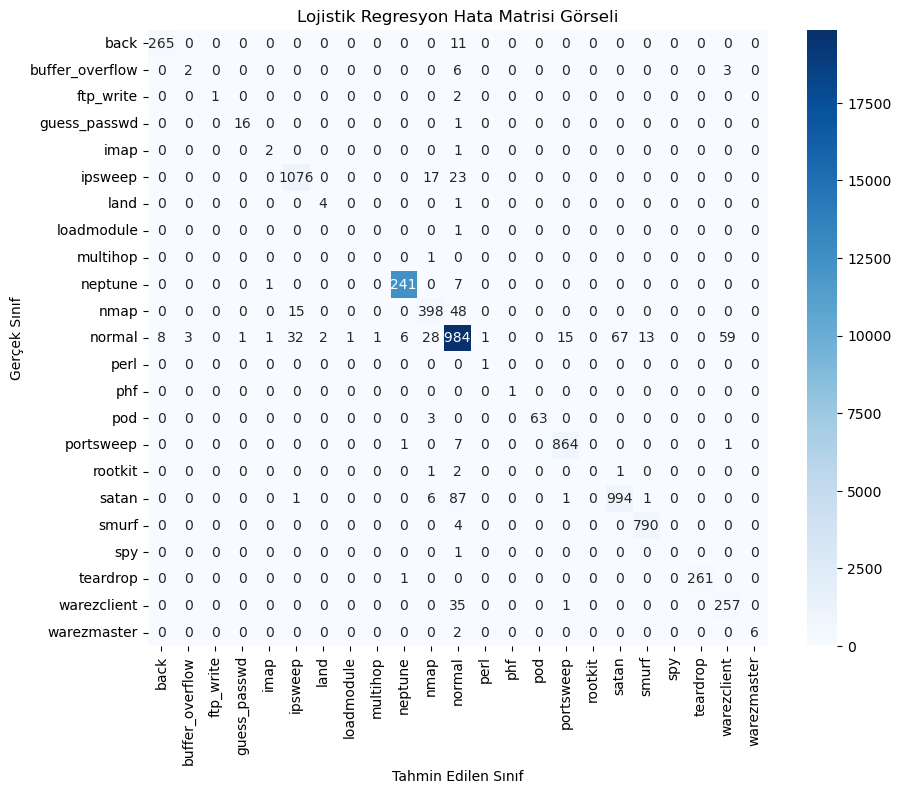

In [10]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


lr_model = LogisticRegression(max_iter=1000, random_state=42, solver='lbfgs')
lr_model.fit(X_train, y_train)


y_pred = lr_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)


print(f"Model Doğruluğu (Accuracy): {accuracy:.4f}")
print("\n--- Sınıflandırma Raporu ---\n", report)


plt.figure(figsize=(10, 8))
labels = le_y.classes_ 

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Lojistik Regresyon Hata Matrisi Görseli')
plt.show()
